### Importing Libraries for Data Processing, Visualization, and Machine Learning Models


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Loading and Displaying the First Few Rows of the AAPL Stock Dataset


In [3]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02-01-2020,72.796005,75.087502,75.150002,73.797501,74.059998,135480400
1,03-01-2020,72.088272,74.357498,75.144997,74.125000,74.287498,146322800
2,06-01-2020,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
3,07-01-2020,72.320976,74.597504,75.224998,74.370003,74.959999,108872000
4,08-01-2020,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


In [4]:
df.shape

(1043, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1043 non-null   object 
 1   Adj Close  1043 non-null   float64
 2   Close      1043 non-null   float64
 3   High       1043 non-null   float64
 4   Low        1043 non-null   float64
 5   Open       1043 non-null   float64
 6   Volume     1043 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 57.2+ KB


In [6]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1.043000e+03
mean,140.387622,142.439827,143.943229,140.773957,142.306175,9.742459e+07
std,34.087416,33.814114,33.912698,33.685706,33.810689,5.407000e+07
min,54.509762,56.092499,57.125000,53.152500,57.020000,2.404830e+07
25%,122.105312,124.783752,125.904999,122.956249,124.555000,6.224455e+07
50%,144.411377,146.770004,148.199997,145.259995,146.649994,8.298240e+07
75%,167.573372,169.775002,171.220001,167.889999,169.755005,1.143590e+08
max,197.144180,198.110001,199.619995,197.000000,198.020004,4.265100e+08


### Visualizing the Closing Price of Apple Stock Over Time
Explore the fluctuation in Apple's stock price with a detailed line plot of its closing prices.


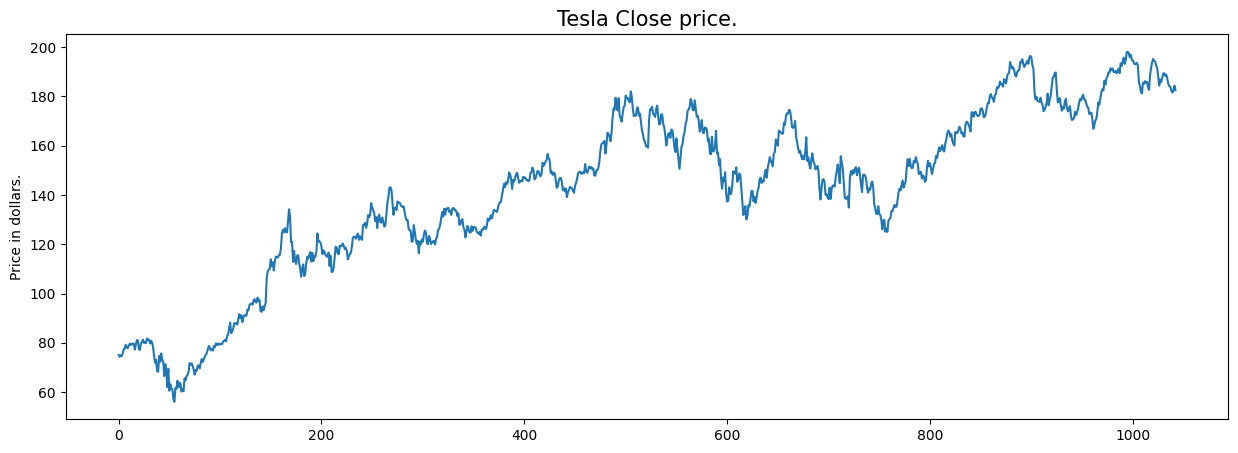

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('APPLE Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [8]:
df[df['Close'] == df['Adj Close']].shape

(0, 7)

In [9]:
df = df.drop(['Adj Close'], axis=1)

In [10]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### Distribution Plots of Apple Stock Features
Explore the distribution of key features in the Apple stock dataset, including 'Open', 'High', 'Low', 'Close', and 'Volume', to understand their individual data patterns.


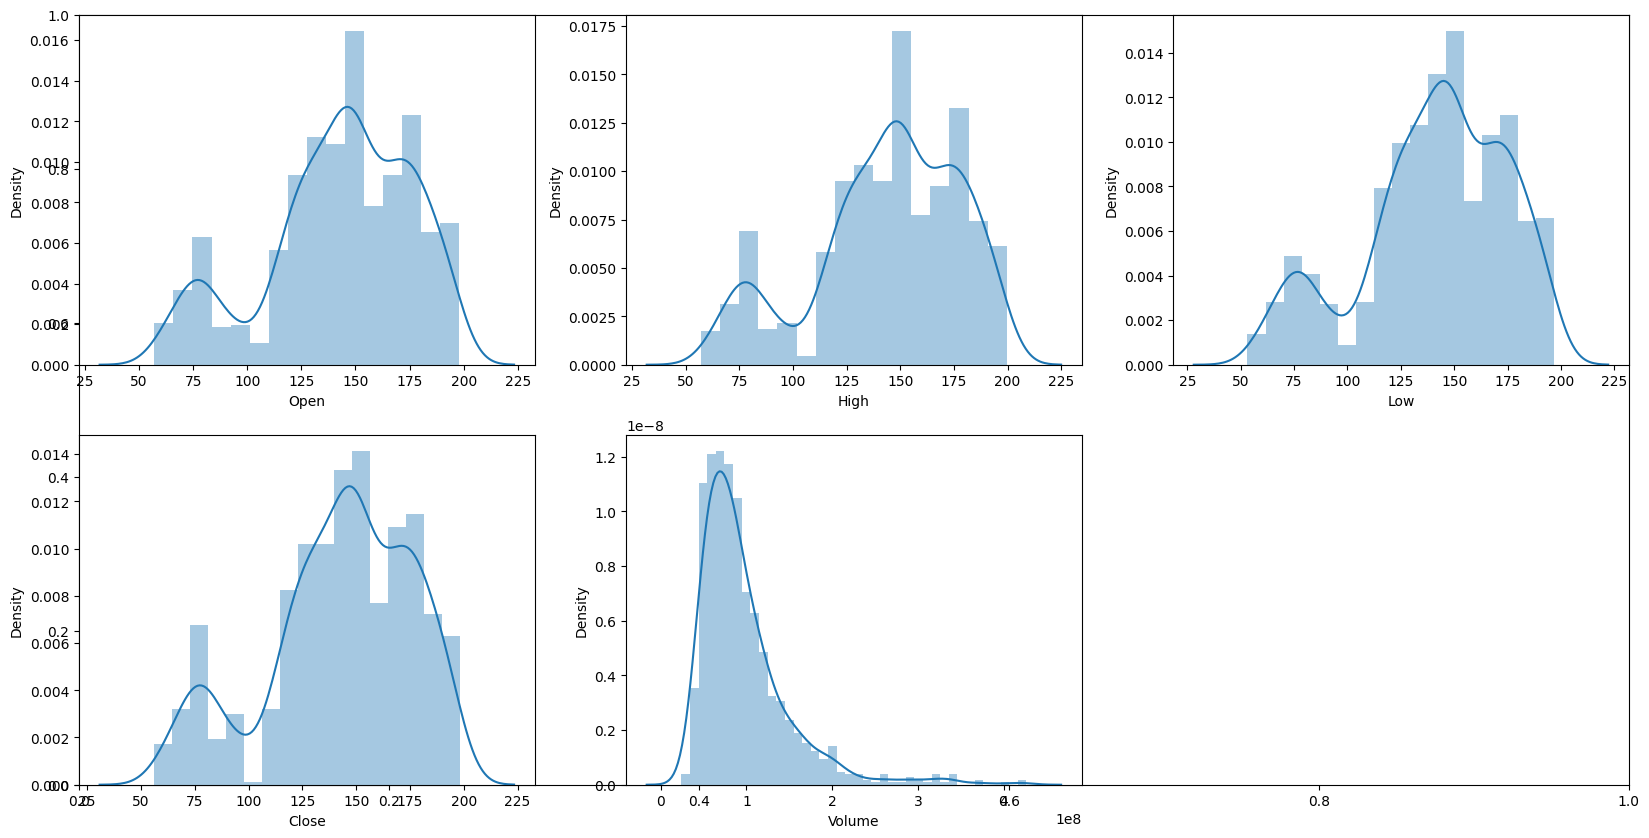

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

### Box Plots of Apple Stock Features
Examine the spread and potential outliers of Apple's stock features—'Open', 'High', 'Low', 'Close', and 'Volume'—through box plots for each feature.


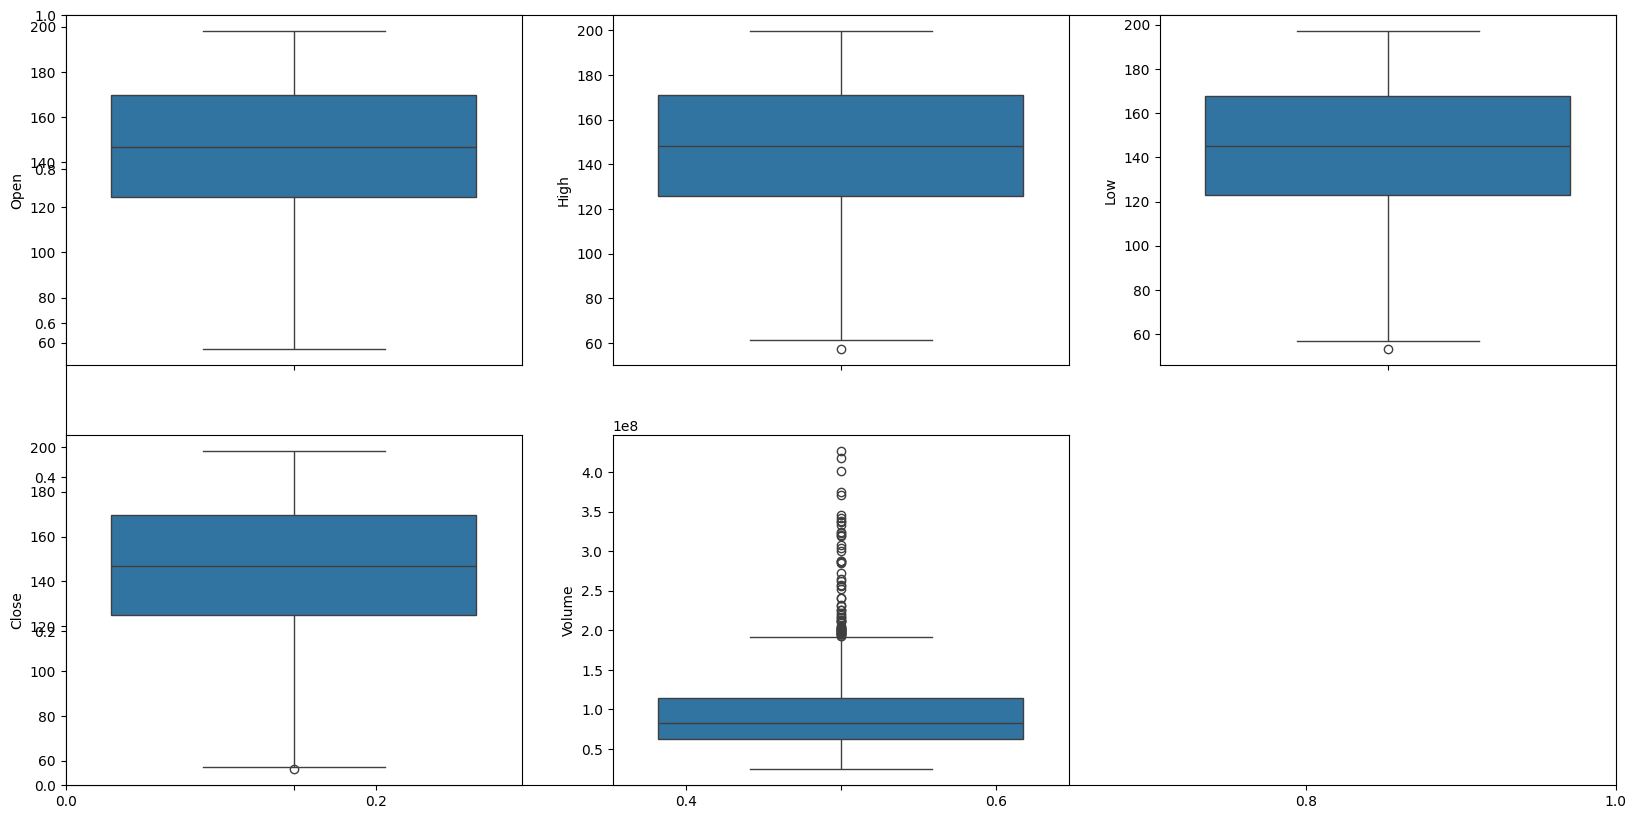

In [12]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

### Extracting Date Components from the 'Date' Column



In [13]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Close,High,Low,Open,Volume,day,month,year
0,02-01-2020,75.087502,75.150002,73.797501,74.059998,135480400,1,2,2020
1,03-01-2020,74.357498,75.144997,74.125000,74.287498,146322800,1,3,2020
2,06-01-2020,74.949997,74.989998,73.187500,73.447502,118387200,1,6,2020
3,07-01-2020,74.597504,75.224998,74.370003,74.959999,108872000,1,7,2020
4,08-01-2020,75.797501,76.110001,74.290001,74.290001,132079200,1,8,2020


In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()



,Date,Close,High,Low,Open,Volume,day,month,year,is_quarter_end
0,02-01-2020,75.087502,75.150002,73.797501,74.059998,135480400,1,2,2020,0
1,03-01-2020,74.357498,75.144997,74.125000,74.287498,146322800,1,3,2020,1
2,06-01-2020,74.949997,74.989998,73.187500,73.447502,118387200,1,6,2020,1
3,07-01-2020,74.597504,75.224998,74.370003,74.959999,108872000,1,7,2020,0
4,08-01-2020,75.797501,76.110001,74.290001,74.290001,132079200,1,8,2020,0


### Average Stock Price by Year for Apple
Visualize the yearly average values of key stock features ('Open', 'High', 'Low', 'Close') through bar plots to observe long-term trends.


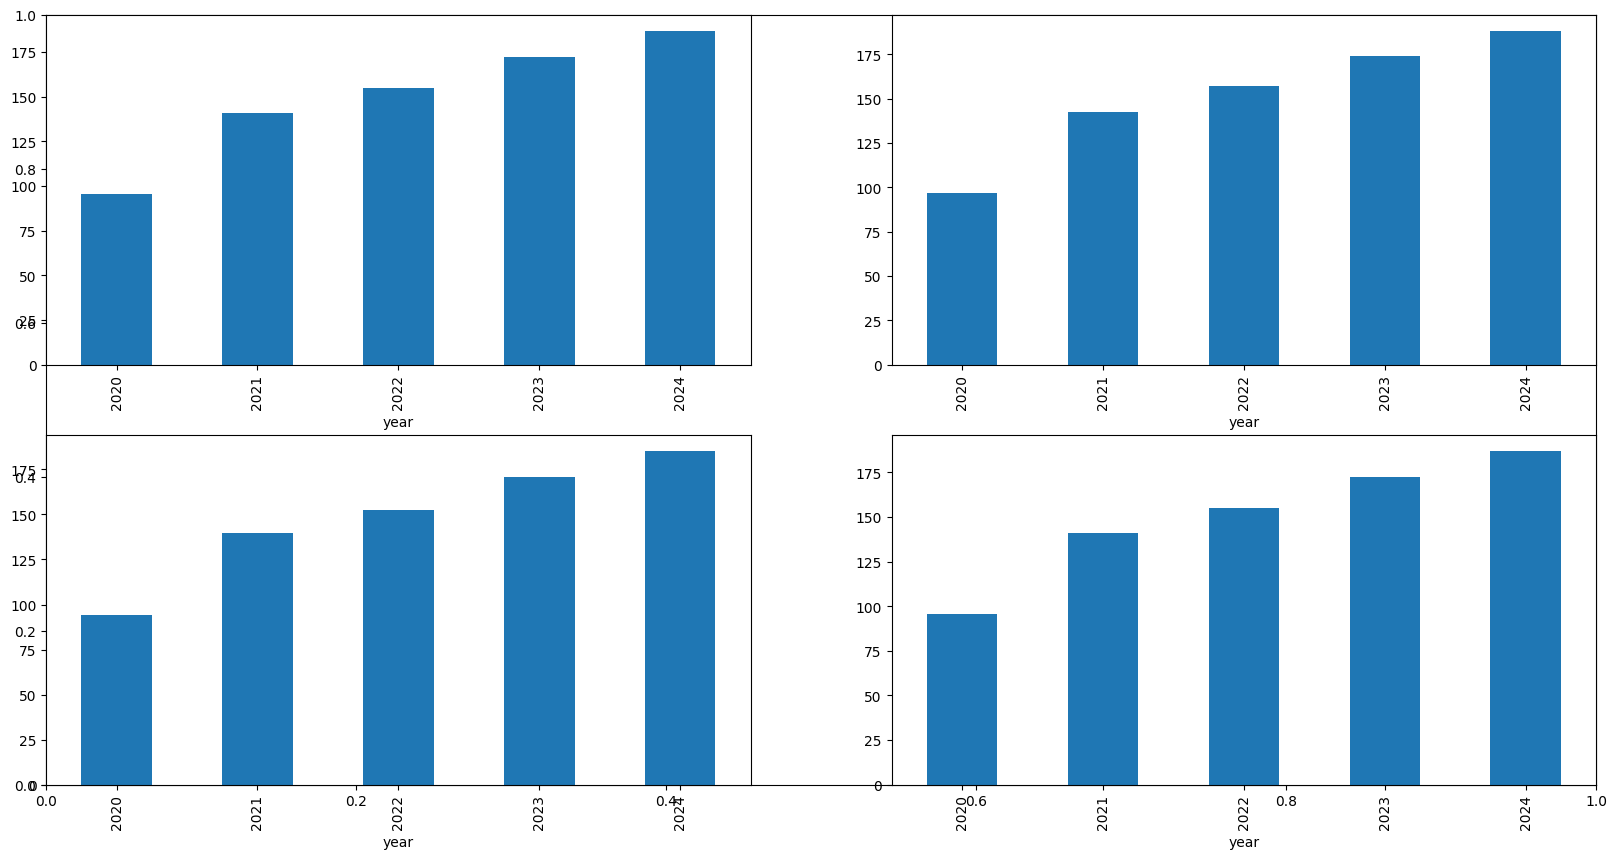

In [15]:

data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [16]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()


,Close,High,Low,Open,Volume,day,month,year
is_quarter_end,,,,,,,,
0,142.870486,144.381389,141.203871,142.772904,9.668904e+07,6.371429,15.391429,2021.588571
1,141.560933,143.049024,139.896582,141.353667,9.892571e+07,6.373178,16.320700,2021.574344


In [17]:


df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)




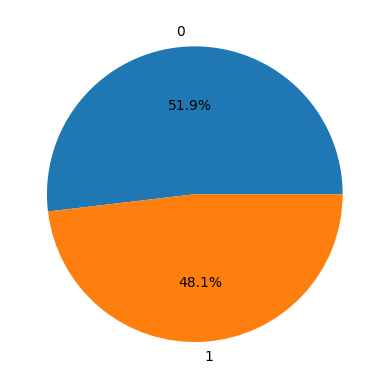

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [18]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


plt.figure(figsize=(10, 10)) 






### Correlation Heatmap of Apple Stock Features
Visualize the correlation between stock features, highlighting highly correlated pairs (greater than 0.9), to identify relationships between different attributes.


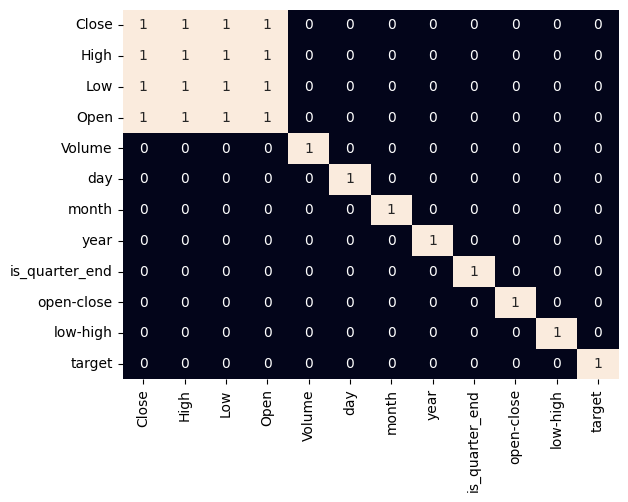

In [19]:
 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()




### Preprocessing Features and Splitting Data for Model Training
Scale the selected features ('open-close', 'low-high', 'is_quarter_end') using StandardScaler and split the dataset into training and validation sets for model evaluation.


In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)




(938, 3) (105, 3)


### Training and Evaluating Multiple Models
Train and evaluate three models—Logistic Regression, SVM with polynomial kernel, and XGBoost Classifier—using ROC AUC scores for both training and validation sets to compare performance.


In [21]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))

  print()



LogisticRegression() : 
Training Accuracy :  0.519346396304135
Validation Accuracy :  0.4967201166180758

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48212830841355453
Validation Accuracy :  0.5951166180758019

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

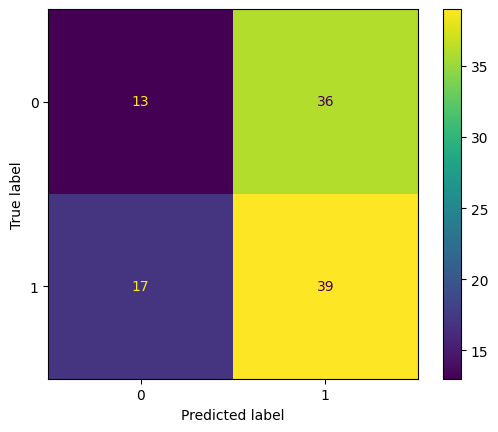

In [22]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()


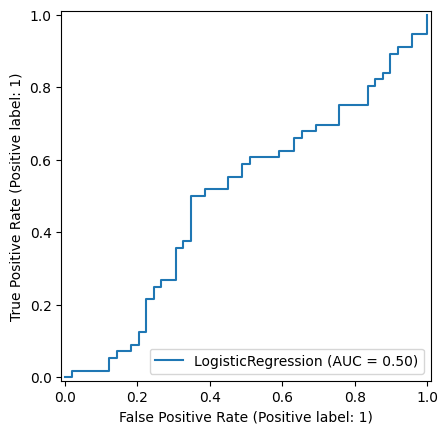

In [23]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(models[0], X_valid, y=Y_valid)
plt.show()

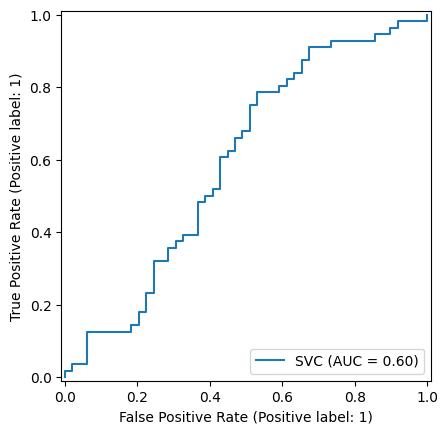

In [24]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(models[1], X_valid, y=Y_valid)
plt.show()

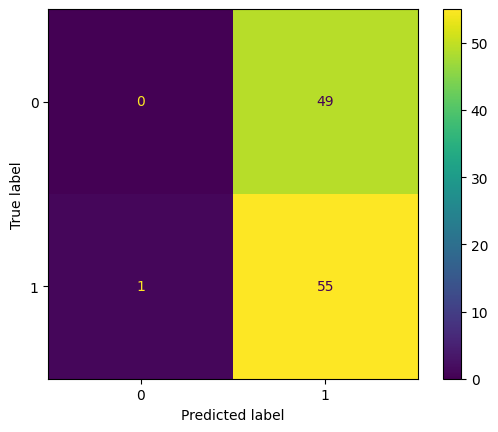

In [26]:
ConfusionMatrixDisplay.from_estimator(models[1], X_valid, Y_valid)
plt.show()